In [2]:
import numpy as np
import pandas as pd
import scipy.io as sio   ## for loading octave matlab file
import math
from scipy.special import expit #Vectorized sigmoid function
import matplotlib.pyplot as plt
import scipy.optimize #fmin_cg to train neural network

In [3]:
mat_contents = sio.loadmat(r"C:\Users\user\Documents\Machine learning\machine-learning-ex4\ex4\ex4data1.mat")
# training data stored in arrays X, y
X=mat_contents['X']
y=mat_contents['y']          #### taking out X and y from the matrix

print('matrix contents')
print(mat_contents)

m=len(X)

theta_contents = sio.loadmat(r"C:\Users\user\Documents\Machine learning\machine-learning-ex4\ex4\ex4weights.mat")
theta1=theta_contents['Theta1']
theta2=theta_contents['Theta2']
print('theta contents')
print(theta_contents)



matrix contents
{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011', '__version__': '1.0', '__globals__': [], 'X': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'y': array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)}
theta contents
{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Oct 18 14:57:02 2011', '__version__': '1.0', '__globals__': [], 'Theta1': array([[-2.25623899e-02, -1.05624163e-08,  2.19414684e-09, ...,
        -1.30529929e-05, -5.04175101e-06,  2.80464449e-09],
       [-9.83811294e-02,  7.66168682e-09, -9.75873689e-09, ...,
        -5.60134007e-05,  2.00940969e-07,  3.54422854e-09],
       [ 1.16156052e-01, -8.77654466e-09,  8.16037764e-09, ...,
        -1.20951

In [4]:
m,n = X.shape

####% Randomly select 100 data points to display
sel = np.random.choice(X.shape[0], size=100, replace=False)
selected_X=X[sel]


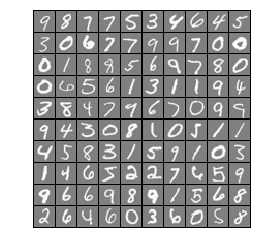

In [5]:
##  FUNCTION TO DISPLAY DATA This function maps each row to a 20 pixel by 20 pixel grayscale image and 
##  displays the images together
def displayData(X, example_width=None):
    # closes previously opened figure. preventing a
    # warning after opening too many figures
    plt.close()
# creates new figure 
    plt.figure()
# Set example_width automatically if not passed in
    if not example_width or not 'example_width' in locals():
        example_width = int(round(math.sqrt(X.shape[1])))
# Gray Image color map 
    plt.set_cmap("gray")
#Compute rows, cols
    m,n = X.shape
    example_height =int(n / example_width)
# Compute number of items to display
    display_rows = int(math.floor(math.sqrt(m)))
    display_cols = int(math.ceil(m / display_rows))
# Between images padding
    pad = 1
# Setup blank display
    display_array = -np.ones((pad + display_rows * (example_height + pad),  pad + display_cols * (example_width + pad)))
    curr_ex = 1
    #Copy each example into a patch on the display array    
    for j in range(1,display_rows+1):
        for i in range(1,display_cols+1):
            if curr_ex > m:
                break
            ##Copy the patch
            #Get the max value of the patch
            max_val = max(abs(X[curr_ex-1, :]))  
            rows = pad + (j - 1) * (example_height + pad) + np.array(range(example_height))
            cols = pad + (i - 1) * (example_width  + pad) + np.array(range(example_width ))
            display_array[rows[0]:rows[-1]+1 , cols[0]:cols[-1]+1] = np.reshape(X[curr_ex-1, :], (example_height, example_width), order="F") / max_val
            curr_ex += 1
        if curr_ex > m:
            break
    # Display Image
    h = plt.imshow(display_array, vmin=-1, vmax=1)
    # Do not show axis
    plt.axis('off')
    plt.show(block=False)
    return h, display_array
a,b=displayData(selected_X)

In [6]:
X=np.concatenate((np.ones((m,1)),X),axis=1)

 ####  Setup the parameters you will use for this exercise
input_layer_size  = 400;  ###%    20x20 Input Images of Digits
hidden_layer_size = 25;   ####%   25 hidden units
num_labels = 10;          ###%    10 labels, from 1 to 10   
                          ##     % (note that we have mapped "0" to label 10)\
###  UNROLLING THE PARAMETERS
nn_params = np.concatenate((theta1.reshape(theta1.size,order='F'),theta2.reshape(theta2.size,order='F')))
print(nn_params)
print(nn_params.shape)

[-0.02256239 -0.09838113  0.11615605 ... -2.11014003 -2.1319153
 -1.32752042]
(10285,)


In [7]:

##### defining the hypothesis
def hypothesis(theta,X):
  # print(type(a))
    hypo=sigmoid(X.dot(theta))    ####calling the sigmoid function
    return hypo
#hypo=hypothesis(theta,X)         #####returning the hyposthesis array  

In [8]:
mylambda=0
k=num_labels
def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y ,mylambda):
    
    ### feed forward the neural network
    a1=X
    a2=expit(a1.dot(theta1.T))
    a2=np.concatenate((np.ones((m,1)),a2),axis=1)
    a3=expit(a2.dot(theta2.T))
    sum=0
    
    Y=np.zeros((m,num_labels)) 

    ####   making Y matrix 
    for i in range(m):
        Y[i][y[i]-1] = 1
        
    '''
    ## this can also be a method without loops
    term1=np.sum(np.multiply(Y,np.log(a3)))
    term2=np.sum(np.multiply((1-Y),np.log(1-a3)))
    sum=(-term1-term2)/m
    '''
    for i in range(m):        
        term1 = np.dot(-np.array(Y[i]).T,np.log(a3[i]))        
        term2 = np.dot((1-np.array(Y[i])).T,np.log(1-a3[i]))        
        sum = sum + float( (1./len(Y)) * ( np.sum(term1 - term2) ) )      #### simple sum over k classifiers

    th1=np.delete(theta1,0,1)      # deleting the 1st column                       
    th2=np.delete(theta2,0,1)      # deleting the 1st column
    theta1_sq=np.sum(th1**2)       # squaring theta1 j,k
    theta2_sq=np.sum(th2**2)       # squaring theta2 j,k
    regterm=(theta1_sq + theta2_sq)*(mylambda/(2*m))         ## calculating regularization term
    return sum+regterm

In [9]:
nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, mylambda)


0.2876291651613187

In [10]:
########    compute cost with regularization       ########

In [11]:
nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, mylambda=1)

0.3837698590909234